<a href="https://colab.research.google.com/github/sami24191/FRED-Economic-Data/blob/main/20240907_fred_unempoyment_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libs and api**

In [2]:
# install fredapi

!pip install fredapi > /dev/null

In [3]:
# import ibraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # what?

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # color palette

plt.style.use('fivethirtyeight') # plot style
#pd.set_option('max_columns', 500) # limiting number of COLUMNS

from fredapi import Fred # fred api

fred_key = '0a2daf884db14f56938c50e630049a67'


**Create fred object**

In [4]:
fred = Fred(api_key=fred_key)

**Search data **

In [5]:
# Cehcking which dataset/sereis is popular under S&P category

#sp_search = fred.search('S&P', order_by = 'popularity')


In [6]:
#sp_search.head(3)

**Pull and join multiple data series**

In [7]:
unemp_results = fred.search('unemployment')

In [8]:
unemp_results.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-11,2024-09-11,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-11,2024-09-11,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:18-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-09-11,2024-09-11,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-09-06 07:47:03-05:00,71,The series comes from the 'Current Population ...


In [9]:
unrate  = fred.get_series('UNRATE')

In [10]:
unrate.head(3)

,0
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0


<Axes: title={'center': 'Unemployment Rate'}>

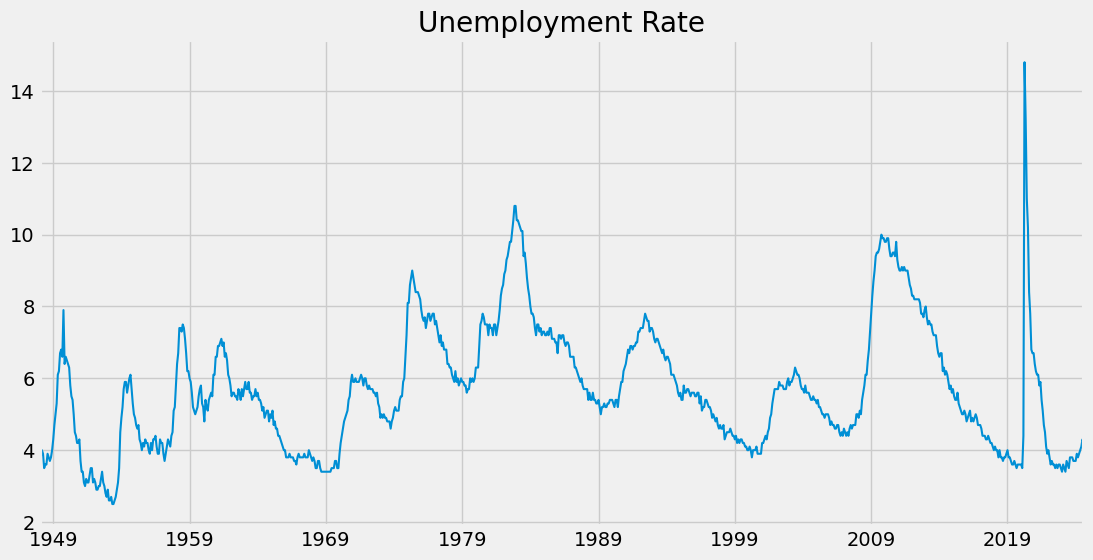

In [11]:
unrate.plot(figsize=(12,6), title='Unemployment Rate', lw=1.5)

Let search whether fred has state-wise unemployment data

In [12]:
unemp_df = fred.search('unemployment state', filter=('frequency','Monthly'))
unemp_df.shape

(1000, 15)

In [13]:
unemp_df.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-11,2024-09-11,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-11,2024-09-11,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:18-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-09-11,2024-09-11,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-09-06 07:47:03-05:00,71,The series comes from the 'Current Population ...


we can see same datasets has different vesions based on seasonality adjusted (or not) and units (percent or thousands of persons). lets trim it down only seasonally adjusted and units in percentage.

In [14]:
unemp_df  = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df.shape

(112, 15)

In [15]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df[unemp_df['notes'].isnull()]  # Filtering rows where 'notes' is None or NaN
unemp_df.shape

(59, 15)

In [16]:
# to get statewise rate, lets ignore regional cencus.
unemp_st_df = unemp_df.loc[~unemp_df['title'].str.contains('Census')]
print(unemp_st_df.shape)
# to get region/division-wsie rate, lets ignore state-wsie rate.
unemp_st_reg = unemp_df.loc[unemp_df['title'].str.contains('Census')]
print(unemp_st_reg.shape)


(54, 15)
(5, 15)


In [17]:
unemp_df = fred.search('unemployment state', filter=('frequency','Monthly'))
print(unemp_df.shape)
unemp_df  = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
print(unemp_df.shape)
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df[unemp_df['notes'].isnull()]  # Filtering rows where 'notes' is None or NaN
print(unemp_df.shape)
# to get statewise rate, lets ignore regional cencus.
unemp_st_df = unemp_df.loc[~unemp_df['title'].str.contains('Census')]
print(unemp_st_df.shape)
# to get region/division-wsie rate, lets ignore state-wsie rate.
unemp_st_reg = unemp_df.loc[unemp_df['title'].str.contains('Census')]
print(unemp_st_reg.shape)

(1000, 15)
(112, 15)
(59, 15)
(54, 15)
(5, 15)


In [18]:
# there are 50 states but we are getting 54. Lets check the index col

print(unemp_st_df.index)


Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'ILUR', 'NCUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'MNUR', 'SCUR', 'NMUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'LASMT261982000000003', 'MTUR', 'DCUR', 'MSUR', 'MEUR',
       'NEUR', 'CTUR', 'IDUR', 'LASMT391746000000003', 'NHUR', 'RIUR', 'KSUR',
       'WYUR', 'DEUR', 'VTUR', 'SDUR'],
      dtype='object', name='series id')


It is not possible to track the state name from the code. lets extract the actual state namw from the title.

In [19]:
unemp_st_df['state_name'] = unemp_st_df['title'].str.replace('Unemployment Rate in', '')
id_to_state = unemp_st_df['state_name'].to_dict()
id_to_state

<ipython-input-19-a7f6b9e73810>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_st_df['state_name'] = unemp_st_df['title'].str.replace('Unemployment Rate in', '')


{'CAUR': ' California',
 'TXUR': ' Texas',
 'NYUR': ' New York',
 'FLUR': ' Florida',
 'PAUR': ' Pennsylvania',
 'OHUR': ' Ohio',
 'MIUR': ' Michigan',
 'ALUR': ' Alabama',
 'MAUR': ' Massachusetts',
 'ILUR': ' Illinois',
 'NCUR': ' North Carolina',
 'NJUR': ' New Jersey',
 'GAUR': ' Georgia',
 'COUR': ' Colorado',
 'AZUR': ' Arizona',
 'WIUR': ' Wisconsin',
 'VAUR': ' Virginia',
 'KYUR': ' Kentucky',
 'MNUR': ' Minnesota',
 'SCUR': ' South Carolina',
 'NMUR': ' New Mexico',
 'TNUR': ' Tennessee',
 'WAUR': ' Washington',
 'MDUR': ' Maryland',
 'ORUR': ' Oregon',
 'WVUR': ' West Virginia',
 'NVUR': ' Nevada',
 'ARUR': ' Arkansas',
 'OKUR': ' Oklahoma',
 'MOUR': ' Missouri',
 'AKUR': ' Alaska',
 'IAUR': ' Iowa',
 'UTUR': ' Utah',
 'PRUR': ' Puerto Rico',
 'INUR': ' Indiana',
 'LAUR': ' Louisiana',
 'HIUR': ' Hawaii',
 'NDUR': ' North Dakota',
 'LASMT261982000000003': ' Detroit-Warren-Dearborn, MI (MSA)',
 'MTUR': ' Montana',
 'DCUR': ' the District of Columbia',
 'MSUR': ' Mississippi',


In [20]:
unemp_st_df = unemp_st_df.drop(['LASMT391746000000003', 'LASMT261982000000003', 'DCUR', 'PRUR'])
print(unemp_st_df.shape)
print(unemp_st_df.index)

(50, 16)
Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'ILUR', 'NCUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'MNUR', 'SCUR', 'NMUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'INUR', 'LAUR', 'HIUR',
       'NDUR', 'MTUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR', 'NHUR', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR'],
      dtype='object', name='series id')


In [21]:
# del
# unemp_st_df['state_name'] = unemp_st_df['title'].str.replace('Unemployment Rate in', '')
# id_to_state = unemp_st_df['state_name'].to_dict()
# id_to_state

In [22]:
unemp_st_df.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes,state_name
series id,,,,,,,,,,,,,,,,
CAUR,CAUR,2024-09-11,2024-09-11,Unemployment Rate in California,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:01-05:00,64,None,California
TXUR,TXUR,2024-09-11,2024-09-11,Unemployment Rate in Texas,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:35:02-05:00,56,None,Texas
NYUR,NYUR,2024-09-11,2024-09-11,Unemployment Rate in New York,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:02-05:00,53,None,New York


In [23]:
#

**merging all states data**

In [24]:
all_result = []

for i in unemp_st_df.index:
  #print(i)
  result = fred.get_series(i)

  # join all the series together
  result = result.to_frame(name = i)

  all_result.append(result)


1. We started by creating an empty list all_result where all the results will be stored.
2. Looping through each row's label (index) in the df "unemp_st_df", one by one.
3. For each label, we will get the related data from FRED
4. Then change the data recieved into a df and name the column after the label used to get the data.
5. Add this df to the all_result so all such dfs can be combined

In [25]:
type(all_result)

list

In [26]:
#type(all_result[1])

In [87]:
unemp_state = pd.concat(all_result, axis=1) # axis = 1 since we want the states side by side
unemp_state.head(3)

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,ILUR,...,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2


1. Combined all the DataFrames: pd.concat(all_result, axis=1) is used to combine all the individual tables (DataFrames) in the all_result list into one big table.

2. Arrangement side-by-side : The axis=1 part means the tables are being joined side by side (horizontally), so each column will represent the data for a different state.

3. Stored the result: The combined table is stored in a new variable called unemp_state, which will now contain all the unemployment data for different states, arranged in columns.

In [28]:
#del
# unemp_st_df['state_name'] = unemp_st_df['title'].str.replace('Unemployment Rate in', '')
# id_to_state = unemp_st_df['state_name'].to_dict()
# id_to_state

In [47]:

#unemp_state.columns

In [30]:
# applying list comp to change the column title from state code to state name

#[id_to_state[i] for i in unemp_state.columns]
unemp_state.columns = [id_to_state[i] for i in unemp_state.columns]

unemp_state

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Illinois,...,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,...,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,...,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,4.8,...,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,4.8,...,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,4.9,...,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,5.0,...,2.6,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0


In [31]:
# from google.colab import files

# file_path = '/content/unemp_state_20240910.csv'
# unemp_state.to_csv(file_path, index=True)

# # Download the file
# files.download(file_path)

In [32]:
# checking for missing value
#unemp_state.isna().sum(axis=1).plot()

**EDA**

In [56]:
# Assuming you have a DataFrame `df` with your unemployment data
fig = px.line(unemp_state, color='variable', title='Unemployment Rate in US States')

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Rate"
)


# Add a slider to filter the time period
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)




/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [45]:
#px.line(unemp_state, title='Unemployment Rate in US States')


1. Major economic events visible:

  a. Early 1980s recession: Sharp spike in unemployment around 1982-1983 \
  b. Early 1990s recession: Smaller but noticeable increase in unemployment \
  c. 2008 Financial Crisis: Significant spike in unemployment rates across all states\
  d. COVID-19 pandemic: Dramatic and sudden spike in 2020, followed by a rapid decline

2. Prior to the pandemic, unemployment rates were pretty low across most states.


In [54]:


fig = px.line(unemp_state.loc[unemp_state.index.year >= 2000], title='Unemployment Rate in US States since 2000')
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Rate"
)
fig.show()


# fig = px.line(unemp_state, title='Unemployment Rate in US States')
# fig.update_layout(
#     xaxis_title="Year",
#     yaxis_title="Rate"
# )
# fig.show()



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [51]:



# ax = unemp_state.loc[unemp_state.index == '2020-04-01'].T \
#     .sort_values('2020-04-01') \
#     .plot(kind='barh', figsize=(12,18), width = 0.6, \
#           title='Unemployment Rate in April 2020')

# ax

In [44]:
# import matplotlib.pyplot as plt
# import numpy as np

# average of all the column in where index = "2024-07-01"

# nat_avg_unemployment_june_2024 = unemp_state.loc["2024-07-01"].mean()
# print(nat_avg_unemployment_june_2024)

# # Plot setup
# fig, ax = plt.subplots(figsize=(10, 8))

# # Assign colors based on whether the state is above or below the national average
# #colors = np.where(unemp_state['Unemployment Rate'] > nat_avg_unemployment_june_2024, 'red', 'blue')

# # Plot the horizontal lines representing each state
# ax.hlines(y=unemp_state.index, xmin=nat_avg_unemployment_june_2024, xmax=unemp_state['Unemployment Rate'], color=colors)

# # Plot the dots representing unemployment rates
# ax.scatter(unemp_state['Unemployment Rate'], unemp_state.index, color=colors, zorder=5)

# # Add a vertical line for the US national average
# ax.axvline(x=nat_avg_unemployment_june_2024, color='gray', linestyle='--')

# # Add labels and title
# ax.set_title('Unemployment Rate Comparison to US Average (Most Recent Month)')
# ax.set_xlabel('Unemployment Rate (%)')
# ax.set_ylabel('States')

# plt.show()


**section 2: participation rate**

In [84]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
print(part_df.shape)
part_df  = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
print(part_df.shape)
#part_df = part_df.loc[part_df['title'].str.contains('Participation Rate')]
#part_df = part_df[part_df['notes'].isnull()]  # Filtering rows where 'notes' is None or NaN
#print(part_df.shape)
# # to get statewise rate, lets ignore regional cencus.
# unemp_st_df = unemp_df.loc[~unemp_df['title'].str.contains('Census')]
# print(unemp_st_df.shape)
# # to get region/division-wsie rate, lets ignore state-wsie rate.
# unemp_st_reg = unemp_df.loc[unemp_df['title'].str.contains('Census')]
# print(unemp_st_reg.shape)


(406, 15)
(109, 15)


In [86]:
part_df['state_name'] = part_df ['title'].str.replace('Labor Force Participation Rate for', '')

# dropping all the row where part_df['state_name'] is not in id_to_state value
part_df = part_df[part_df['state_name'].isin(id_to_state.values())]

print (part_df.shape)



(50, 16)


In [88]:
all_result = []

for i in part_df.index:
  #print(i)
  result = fred.get_series(i)

  # join all the series together
  result = result.to_frame(name = i)

  all_result.append(result)

In [89]:
part_state = pd.concat(all_result, axis=1) # axis = 1 since we want the states side by side
part_state.head(3)

,LBSSA06,LBSSA01,LBSSA36,LBSSA26,LBSSA28,LBSSA48,LBSSA12,LBSSA21,LBSSA39,LBSSA55,...,LBSSA41,LBSSA33,LBSSA50,LBSSA09,LBSSA38,LBSSA46,LBSSA20,LBSSA44,LBSSA10,LBSSA56
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,...,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,...,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,...,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,62.5,64.7


In [91]:
part_id_to_state = part_df['state_name'].to_dict()
#part_id_to_state

# now applying list comp to change the column title from state id to state name


part_state.columns = [part_id_to_state[i] for i in part_state.columns]

#part_state

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,...,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,...,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,...,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,...,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,...,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,...,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,62.0,57.4,61.4,62.3,53.7,64.1,59.4,56.9,61.8,65.6,...,62.8,65.3,65.4,64.6,68.9,67.7,66.1,64.4,60.3,63.0
2024-04-01,62.0,57.5,61.3,62.3,53.7,64.2,59.3,57.1,61.8,65.6,...,62.9,65.5,65.5,64.6,69.0,67.6,66.1,64.7,60.1,63.0
2024-05-01,62.0,57.5,61.3,62.3,53.8,64.2,59.1,57.3,61.9,65.6,...,63.0,65.6,65.6,64.7,68.9,67.5,66.1,64.9,59.9,62.9
2024-06-01,62.0,57.5,61.3,62.3,54.0,64.3,58.9,57.4,62.1,65.5,...,63.0,65.6,65.7,64.6,68.9,67.5,66.1,65.1,59.8,63.0


In [92]:
# Combine the dataframes
combined_df = pd.concat([unemp_state.loc[unemp_state.index.year >= 2000], part_state.loc[part_state.index.year >= 2000]], axis=1)

# Create the plot
fig = px.line(combined_df,
              color='variable',
              title='Unemployment Rate and Labor Force Participation Rate in US States since 2000')

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Rate"
)

# Add a slider to filter the time period
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

